# Einführung in Machine Learning

## Model Validation: the "not so right" way

In [1]:
# Import
import matplotlib.pyplot as plt
import numpy as np

# Get some data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
# Get some model and hyperparameter
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
# Train the model to our data
model.fit(X, y)
y_model = model.predict(X)

In [4]:
# Test on the training set
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

## Model Validation: the right way

In [5]:
X.shape

(150, 4)

In [6]:
y.shape

(150,)

In [7]:
# Import
from sklearn.model_selection import train_test_split

# split the data in train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [8]:
X_train.shape

(75, 4)

In [9]:
X_train

array([[5.7, 2.9, 4.2, 1.3],
       [5.4, 3.7, 1.5, 0.2],
       [6.4, 2.7, 5.3, 1.9],
       [5.6, 2.9, 3.6, 1.3],
       [5.8, 4. , 1.2, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5.5, 2.3, 4. , 1.3],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [5.8, 2.8, 5.1, 2.4],
       [4.8, 3. , 1.4, 0.3],
       [4.6, 3.4, 1.4, 0.3],
       [6.9, 3.1, 5.4, 2.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.4, 3.2, 5.3, 2.3],
       [6. , 2.7, 5.1, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [5. , 3.3, 1.4, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [7.3, 2.9, 6.3, 1.8],
       [5.5, 2.4, 3.7, 1. ],
       [6.5, 3.2, 5.1, 2. ],
       [6.1, 2.8, 4.7, 1.2],
       [6.7, 3.3, 5.7, 2.5],
       [5.4, 3.9, 1.7, 0.4],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 3.2, 4.5, 1.5],
       [5. , 3.5, 1.3, 0.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.7, 3.1, 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [5. , 3.4, 1.6, 0.4],
       [5.1, 3.8, 1.9, 0.4],
       [7.2, 3.2, 6. , 1.8],
       [6.8, 3

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 4)
(75, 4)
(75,)
(75,)


In [11]:
# Fit the model on one set of data
model.fit(X_train, y_train)

# Evaluate the model on the second set of data
y_predicted = model.predict(X_test)
accuracy_score(y_test, y_predicted)

0.92

In [12]:
model.score(X_test, y_test)

0.92

## Model Validation: Cross-Validation

In [13]:
# split the data in train/test sets
X1, X2, y1, y2 = train_test_split(X, y, train_size=0.5)

# Two-fold Cross-Validation
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9466666666666667)

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [15]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Hyperparameter Tuning

In [16]:
import numpy as np

def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Text(0.5, 0, 'Feature')

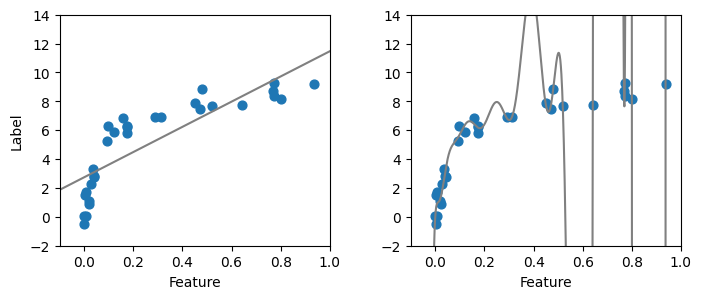

In [18]:
X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(7, 3))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.3)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Label')
#ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_xlabel('Feature')
#ax[1].set_title('High-variance model: Overfits the data', size=14)


Text(0.02, 0.91, 'validation score: $R^2$ = -6.4e+08')

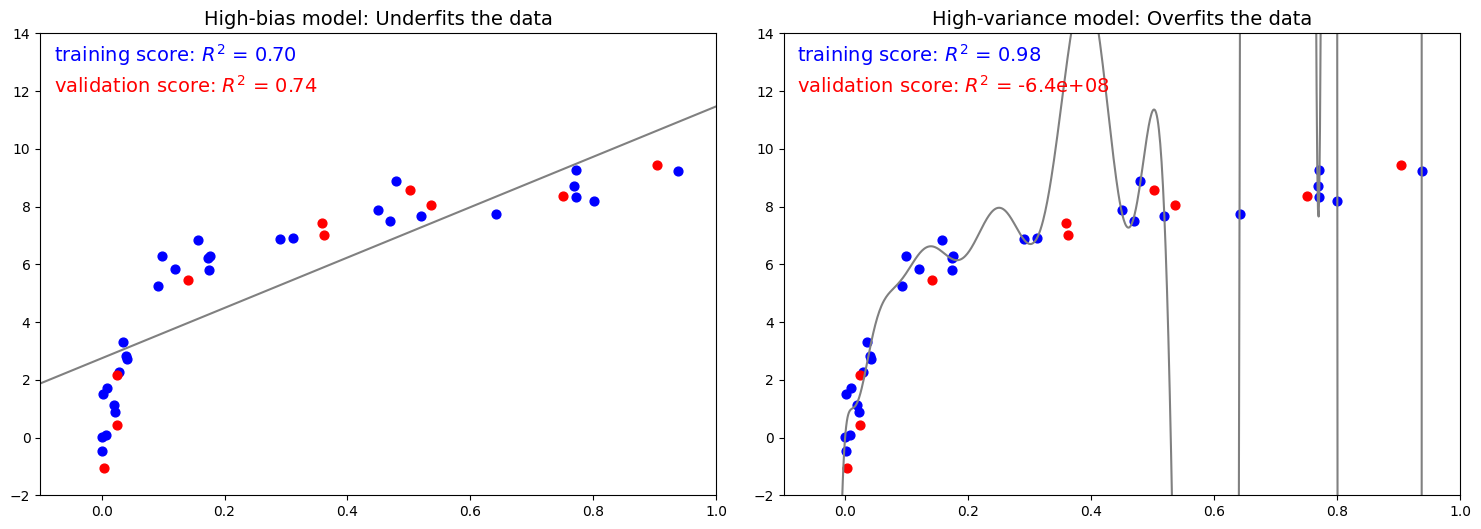

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

X2, y2 = make_data(10, rseed=42)

ax[0].scatter(X.ravel(), y, s=40, c='blue')
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)
ax[0].scatter(X2.ravel(), y2, s=40, c='red')
ax[0].text(0.02, 0.98, "training score: $R^2$ = {0:.2f}".format(model1.score(X, y)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='blue')
ax[0].text(0.02, 0.91, "validation score: $R^2$ = {0:.2f}".format(model1.score(X2, y2)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='red')

ax[1].scatter(X.ravel(), y, s=40, c='blue')
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].scatter(X2.ravel(), y2, s=40, c='red')
ax[1].text(0.02, 0.98, "training score: $R^2$ = {0:.2g}".format(model20.score(X, y)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='blue')
ax[1].text(0.02, 0.91, "validation score: $R^2$ = {0:.2g}".format(model20.score(X2, y2)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='red')


## Validierungskurven in sklearn

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [21]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

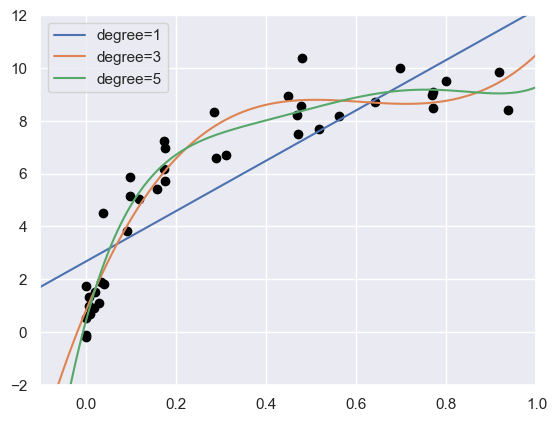

In [22]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_fit = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_fit = PolynomialRegression(degree).fit(X, y).predict(X_fit)
    plt.plot(X_fit.ravel(), y_fit, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

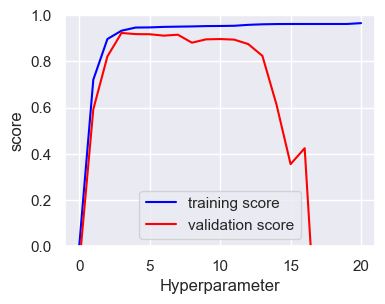

In [23]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.figure(figsize=(4, 3))
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Hyperparameter')
plt.ylabel('score');

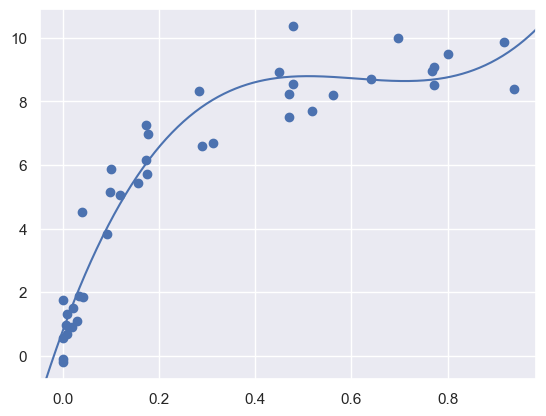

In [24]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_fit = PolynomialRegression(3).fit(X, y).predict(X_fit)
plt.plot(X_fit.ravel(), y_fit);
plt.axis(lim);

## Learning Curves

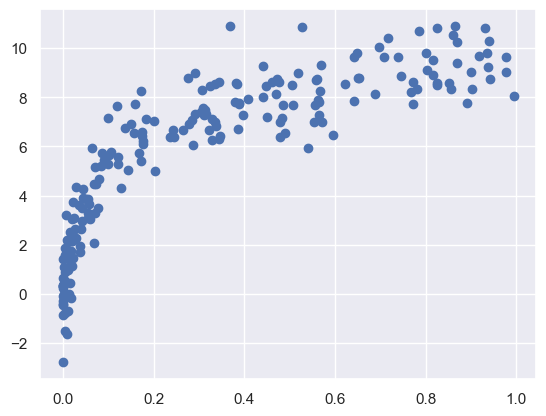

In [25]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

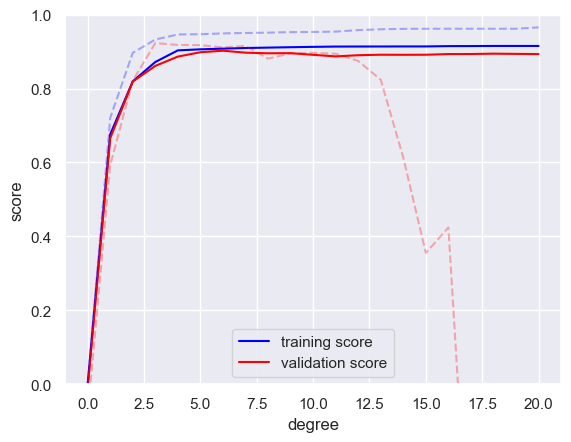

In [26]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [27]:
np.linspace(0.3, 1, 25)

array([0.3       , 0.32916667, 0.35833333, 0.3875    , 0.41666667,
       0.44583333, 0.475     , 0.50416667, 0.53333333, 0.5625    ,
       0.59166667, 0.62083333, 0.65      , 0.67916667, 0.70833333,
       0.7375    , 0.76666667, 0.79583333, 0.825     , 0.85416667,
       0.88333333, 0.9125    , 0.94166667, 0.97083333, 1.        ])

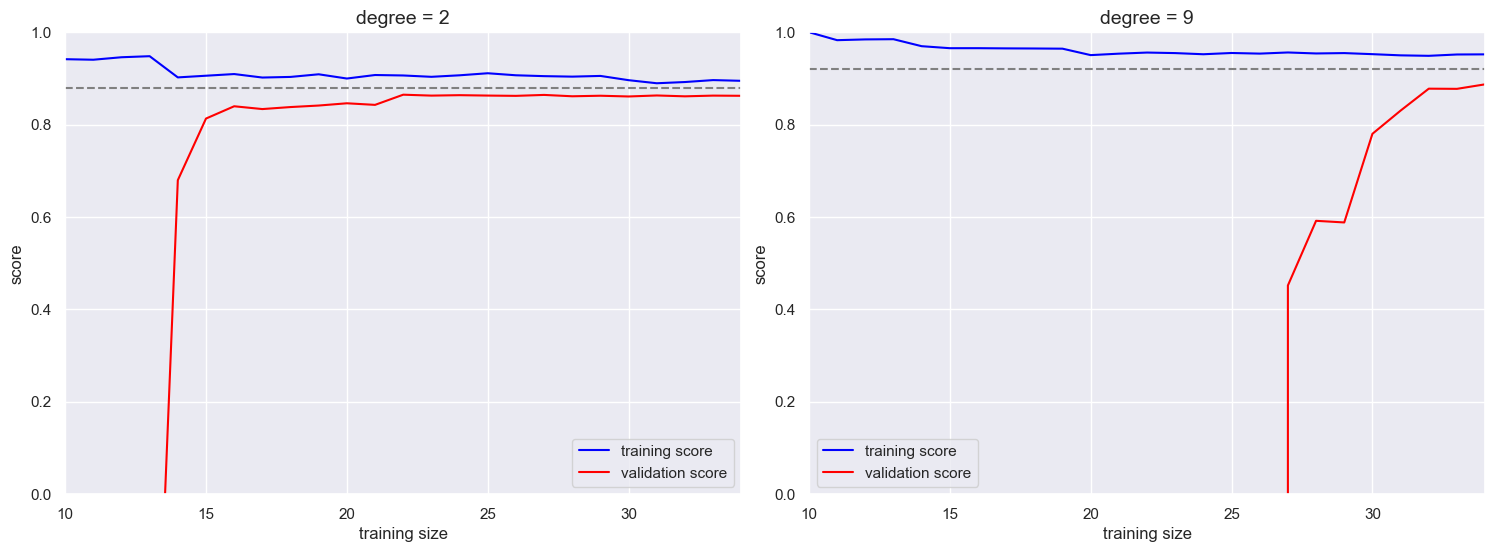

In [28]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

## Validierung in der Praxis: Grid Search

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              }

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [30]:
grid

,estimator,Pipeline(step...egression())])
,param_grid,"{'linearregression__fit_intercept': [True, False], 'polynomialfeatures__degree': array([ 0, 1..., 18, 19, 20])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,7
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,degree,2


In [31]:
grid.fit(X, y);

In [32]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'polynomialfeatures__degree': np.int64(4)}

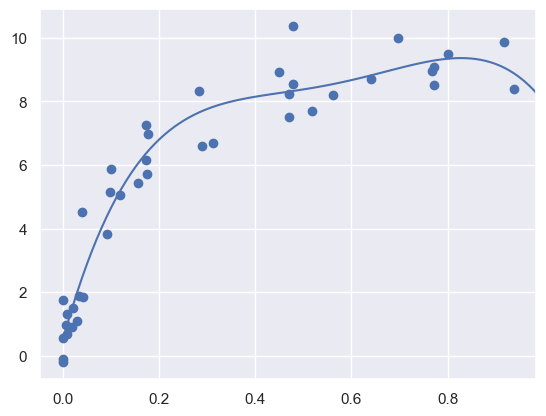

In [33]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
X_new = np.linspace(0, 1, 100).reshape(-1, 1)
y_new = model.fit(X, y).predict(X_new)
plt.plot(X_new, y_new);
plt.axis(lim);